# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
type_ride_count = pyber_data_df.groupby("type").count()["ride_id"]

In [4]:
#  2. Get the total drivers for each city type
type_drivers_count = city_data_df.groupby("type").sum()["driver_count"]

In [5]:
#  3. Get the total amount of fares for each city type
type_fares_sum = pyber_data_df.groupby("type").sum()["fare"]

In [6]:
#  4. Get the average fare per ride for each city type. 
type_fares_avg = pyber_data_df.groupby("type").mean()["fare"]

In [7]:
# 5. Get the average fare per driver for each city type. 
type_fares_per_driver_avg = type_fares_sum/type_drivers_count
type_fares_per_driver_avg

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides":type_ride_count,
    "Total Drivers":type_drivers_count,
    "Total Fares":type_fares_sum,
    "Average Fare per Ride":type_fares_avg,
    "Average Fare per Driver":type_fares_per_driver_avg
})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df_vf = pyber_summary_df.copy()

pyber_summary_df_vf["Total Rides"] = pyber_summary_df_vf["Total Rides"].map('{:,}'.format)
pyber_summary_df_vf["Total Drivers"] = pyber_summary_df_vf["Total Drivers"].map('{:,}'.format)
pyber_summary_df_vf["Total Fares"] = pyber_summary_df_vf["Total Fares"].map('${:,.2f}'.format)
pyber_summary_df_vf["Average Fare per Ride"] = pyber_summary_df_vf["Average Fare per Ride"].map('${:,.2f}'.format)
pyber_summary_df_vf["Average Fare per Driver"] = pyber_summary_df_vf["Average Fare per Driver"].map('${:,.2f}'.format)

pyber_summary_df_vf

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_fares_sum_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
type_fares_sum_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_fares_sum_df=type_fares_sum_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

#Convert date to datetime
type_fares_sum_df["date"] = pd.to_datetime(type_fares_sum_df["date"])

pivot_fares_summary_df = type_fares_sum_df.pivot(index="date",columns="type",values="fare")
pivot_fares_summary_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_apr_fares_summary_df = pivot_fares_summary_df.loc[(pivot_fares_summary_df.index>='2019-01-01')
                                                      &(pivot_fares_summary_df.index<='2019-04-29')]

jan_apr_fares_summary_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
jan_apr_fares_summary_df.index = pd.to_datetime(jan_apr_fares_summary_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_apr_fares_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#jan_apr_fares_summary_df.head()
#jan_apr_fares_summary_df.resample('w').count()
weekly_jan_apr_fares_summary_df = jan_apr_fares_summary_df.resample('w').sum()

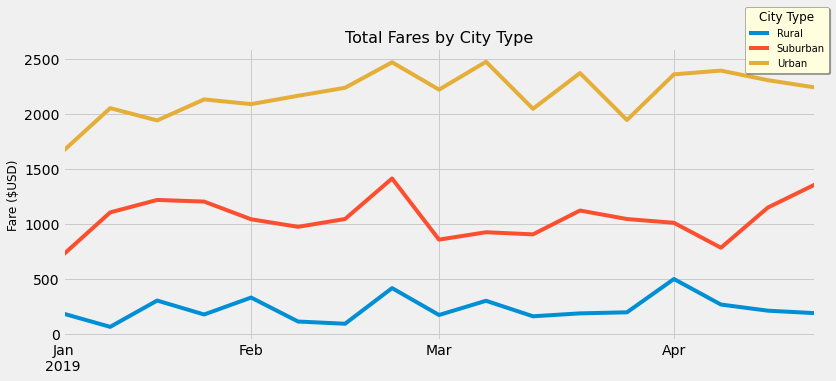

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_jan_apr_fares_summary_df.plot(kind="line",figsize=(12,5))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.title("Total Fares by City Type", fontsize = 16)
plt.xlabel("")
plt.ylabel("Fare ($USD)", fontsize=12)

lgnd = plt.legend(fontsize=10, title="City Type",facecolor="lightyellow",edgecolor="dimgray",bbox_to_anchor=(.9,.9),shadow=True)
lgnd.get_title().set_fontsize(12)

plt.savefig("Analysis/FaresbyCityType.png")

plt.show()